In [146]:
import openpyxl
import csv 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import openpyxl
import csv 
from sklearn.impute import KNNImputer
import warnings
from sklearn.model_selection import cross_val_score

#pulzia dati e creazione file csv
def force_to_numeric(dataframe1, dataframe2, dataframe3):
    cols = ['2023', '2022', '2021', '2020', '2019', '2018']
    dataframe1[cols] = dataframe1[cols].apply(pd.to_numeric, errors='coerce')
    dataframe2[cols] = dataframe2[cols].apply(pd.to_numeric, errors='coerce')
    dataframe3[cols] = dataframe3[cols].apply(pd.to_numeric, errors='coerce')
    
    return dataframe1, dataframe2, dataframe3



def column_remove(dataframe1, dataframe2, dataframe3):
    dataframe1 = dataframe1.iloc[:, :7]
    dataframe2 = dataframe2.iloc[:, :7]
    dataframe3 = dataframe3.iloc[:, :7]

    return dataframe1, dataframe2, dataframe3

def average_calculator(dataframe):
    row_averages = dataframe.mean(axis=1).astype(int)
    return row_averages

def generate_overall_trend_correlation(df1: pd.DataFrame, df2: pd.DataFrame) -> None:
    """
    Calculates the correlation between the differences in values for each column of two input dataframes and prints the results.

    Args:
        df1 (pd.DataFrame): The first input dataframe.
        df2 (pd.DataFrame): The second input dataframe.

    Returns:
        None: The function only prints the correlation matrices for each column.
    """
    common_columns = df1.columns.intersection(df2.columns)
    for column in common_columns:
        diff_df1 = df1[column].diff().dropna()
        diff_df2 = df2[column].diff().dropna()

        merged_diff_df = pd.concat([diff_df1, diff_df2], axis=1)
        correlation = merged_diff_df.corr()
        print(f'Correlation in trend for {column}:\n', correlation)

def generate_yearly_correlations(df1: pd.DataFrame, df2: pd.DataFrame) -> None:
    """
    Calculates the correlation between columns of two input dataframes and prints the results.

    Args:
        df1 (pd.DataFrame): The first input dataframe.
        df2 (pd.DataFrame): The second input dataframe.

    Returns:
        None: The function only prints the correlation matrices for each common column.
    """
    common_columns = df1.columns.intersection(df2.columns)
    for column in common_columns:
        merged_df = pd.concat([df1[column], df2[column]], axis=1)
        correlation = merged_df.corr()
        print(f'Correlation for {column}:\n', correlation)


def knn_impute(dataframe):
    numeric_data = dataframe.select_dtypes(include=[np.number])
    cv_scores = []
    for k in range(1, 51):
        imputer = KNNImputer(n_neighbors=k)
        scores = cross_val_score(imputer, numeric_data, cv=5, scoring='neg_mean_squared_error')
        cv_scores.append(scores.mean())
    optimal_k = cv_scores.index(max(cv_scores)) + 1
    imputer = KNNImputer(n_neighbors=optimal_k)
    imputed_data = imputer.fit_transform(numeric_data)
    imputed_df = pd.DataFrame(imputed_data, columns=numeric_data.columns)
    dataframe[numeric_data.columns] = imputed_df
    return dataframe, optimal_k




#education science and research
df_total_research_fundings = pd.read_excel("../data/education_science_research/total_research_funding.xlsx", skiprows=18)
df_men_research_fundings = pd.read_excel("../data/education_science_research/men_research_funding.xlsx", skiprows=18)
df_women_research_fundings = pd.read_excel("../data/education_science_research/women_research_funding.xlsx", skiprows=18)
df_total_research_fundings.to_csv("../data/education_science_research/total_research_funding.csv", index=False)
df_men_research_fundings.to_csv("../data/education_science_research/men_research_funding.csv", index=False)
df_women_research_fundings.to_csv("../data/education_science_research/women_research_funding.csv", index=False)

#environment and climate change
df_total_political_executives = pd.read_excel("../data/environment_climate_change/total_political_executives_climate.xlsx", skiprows=18)
df_men_political_executives = pd.read_excel("../data/environment_climate_change/men_political_executives_climate.xlsx", skiprows=18)
df_women_political_executives = pd.read_excel("../data/environment_climate_change/women_political_executives_climate.xlsx", skiprows=18)
df_total_political_executives.to_csv("../data/environment_climate_change/total_political_executives_climate.csv", index=False)
df_men_political_executives.to_csv("../data/environment_climate_change/men_political_executives_climate.csv", index=False)
df_women_political_executives.to_csv("../data/environment_climate_change/women_political_executives_climate.csv", index=False)


#major political party leaders
df_total_political_parties = pd.read_excel("../data/major_political_party_leaders/total_political_parties.xlsx", skiprows=18)
df_men_political_parties = pd.read_excel("../data/major_political_party_leaders/men_political_parties.xlsx", skiprows=18)
df_women_political_parties = pd.read_excel("../data/major_political_party_leaders/women_political_parties.xlsx", skiprows=18)
df_total_political_parties.to_csv("../data/major_political_party_leaders/total_political_parties.csv", index=False)
df_men_political_parties.to_csv("../data/major_political_party_leaders/men_political_parties.csv", index=False)
df_women_political_parties.to_csv("../data/major_political_party_leaders/women_political_parties.csv", index=False)


#public EU administrations
df_public_adm_total = pd.read_excel("../data/European_public_admin/european_agencies_total.xlsx", skiprows=18)
df_public_adm_men = pd.read_excel("../data/European_public_admin/european_agencies_men.xlsx", skiprows=18)
df_public_adm_women = pd.read_excel("../data/European_public_admin/european_agencies_women.xlsx", skiprows=18)
df_public_adm_total.to_csv("../data/European_public_admin/european_agencies_total.csv", index=False)
df_public_adm_men.to_csv("../data/European_public_admin/european_agencies_men.csv", index=False)
df_public_adm_women.to_csv("../data/European_public_admin/european_agencies_women.csv", index=False)



#european courts
df_total_european_court = pd.read_excel("../data/european_courts/total_judges_european_court.xlsx", skiprows=18)
df_men_european_court = pd.read_excel("../data/european_courts/men_judges_european_court.xlsx", skiprows=18)
df_women_european_court = pd.read_excel("../data/european_courts/women_judges_european_court.xlsx", skiprows=18)
df_total_european_court.to_csv("../data/european_courts/total_judges_european_court.csv", index=False)
df_men_european_court.to_csv("../data/european_courts/men_judges_european_court.csv", index=False)
df_women_european_court.to_csv("../data/european_courts/women_judges_european_court.csv", index=False)


#european finance
df_european_financial_institutions_total = pd.read_excel("../data/European_finance/european_financial_institutions_total.xlsx", skiprows=18)
df_european_financial_institutions_men = pd.read_excel("../data/European_finance/european_financial_institutions_men.xlsx", skiprows=18)
df_european_financial_institutions_women = pd.read_excel("../data/European_finance/european_financial_institutions_women.xlsx", skiprows=18)
df_european_financial_institutions_total.to_csv("../data/European_finance/european_financial_institutions_total.csv", index = False)
df_european_financial_institutions_men.to_csv("../data/European_finance/european_financial_institutions_men.csv", index= False)
df_european_financial_institutions_women.to_csv("../data/European_finance/european_financial_institutions_women.csv", index= False)


In [147]:
#Averages of member headcount based on sex of the european financial institutions
df_european_financial_institutions_women, df_european_financial_institutions_men, df_european_financial_institutions_total = column_remove(df_european_financial_institutions_women, df_european_financial_institutions_men, df_european_financial_institutions_total)
df_european_financial_institutions_women = df_european_financial_institutions_women.drop([0])
df_european_financial_institutions_men = df_european_financial_institutions_men.drop([0])
df_european_financial_institutions_total = df_european_financial_institutions_total.drop([0])
european_financial_institutions_men, european_financial_institutions_women, european_financial_institutions_total = force_to_numeric(df_european_financial_institutions_men, df_european_financial_institutions_women, df_european_financial_institutions_total)
df_european_financial_institutions_men.set_index('Time', inplace=True)
df_european_financial_institutions_women.set_index('Time', inplace=True)
df_european_financial_institutions_men = average_calculator(df_european_financial_institutions_men)
df_european_financial_institutions_women = average_calculator(df_european_financial_institutions_women)
row_averages1 = df_european_financial_institutions_men 
row_averages2 = df_european_financial_institutions_women
# print(row_averages1)
# print(row_averages2)
# print(df_european_financial_institutions_women)
# print(df_european_financial_institutions_men)
# merged_df = pd.merge(df_european_financial_institutions_men, df_european_financial_institutions_women, left_index=True, right_index=True, how='outer')
merged_series = pd.concat([row_averages1, row_averages2], axis=1)
# merged_series.plot(kind="bar")
average_calculator(df_women_research_fundings)




C:\Users\salva\AppData\Local\Temp\ipykernel_20256\608362928.py:32: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  row_averages = dataframe.mean(axis=1).astype(int)


0       4
1      15
2       3
3       5
4       4
5       2
6       2
7      48
8      11
9       1
10     18
11      1
12     18
13    329
14    339
15      6
16      8
17      1
18      0
19     15
20     57
21      5
22     42
23      3
24     11
25      4
26     19
27     28
28     13
29      5
30      2
31     10
32     14
33      4
34     40
35      3
36     49
37      3
38      1
39      2
40     10
41      2
dtype: int32

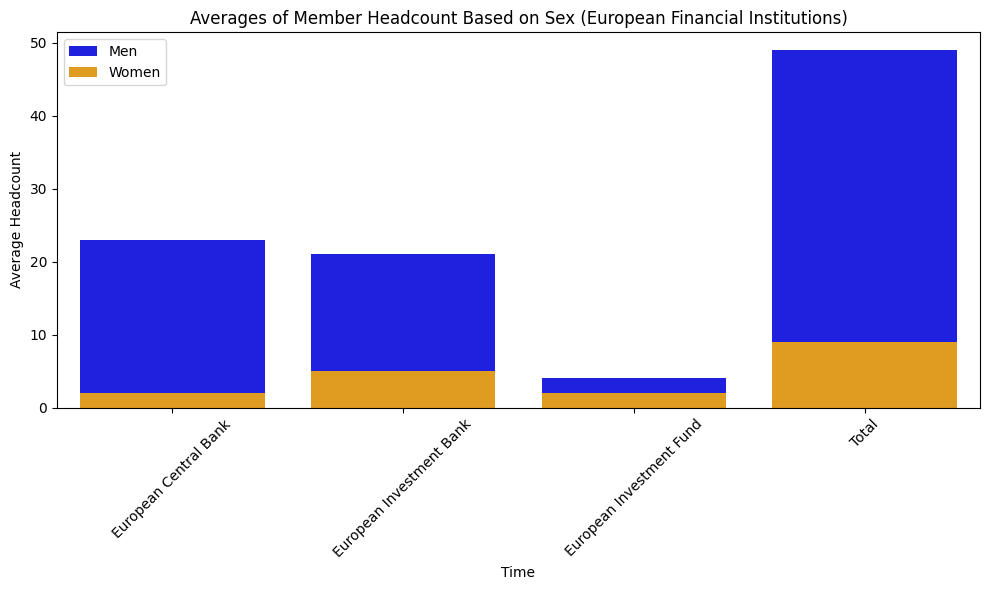

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supponendo che 'row_averages1' e 'row_averages2' siano Series con indice 'Time'
# Concatena le due Series in un DataFrame
df_plot = pd.concat([row_averages1, row_averages2], axis=1)
df_plot.columns = ['Men', 'Women']  # Rinomina le colonne

# Utilizza Seaborn per creare un barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=df_plot.index, y='Men', data=df_plot, color='blue', label='Men')
sns.barplot(x=df_plot.index, y='Women', data=df_plot, color='orange', label='Women')

plt.title('Averages of Member Headcount Based on Sex (European Financial Institutions)')
plt.xlabel('Time')
plt.ylabel('Average Headcount')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

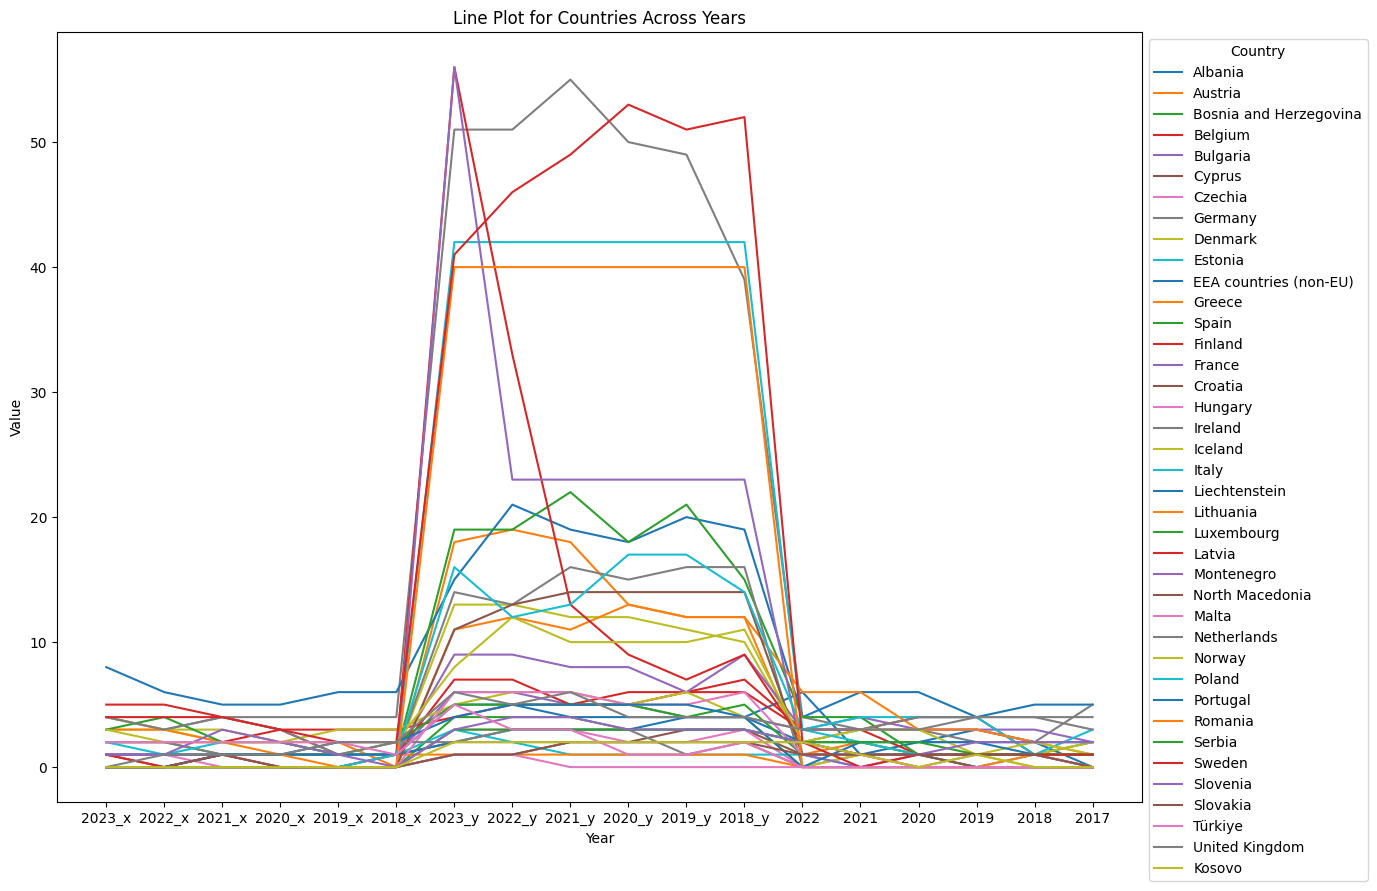

,Geographic region,2023 pol-p,2022 pol-p,2021 pol-p,2020 pol-p,2019 pol-p,2018 pol-p,2023 w-r-f,2022 w-r-f,2021 w-r-f,2020 w-r-f,2019 w-r-f,2018 w-r-f,2022 w-r-e,2021 w-r-e,2020 w-r-e,2019 w-r-e,2018 w-r-e,2017 w-r-e
0,Albania,0,0,1,1,1,1,5,5,4,4,4,4,6,1,2,3,2,0
1,Austria,2,2,2,2,2,0,18,19,18,13,12,12,1,2,1,1,1,0.0
2,Bosnia and Herzegovina,0,0,0,0,0,0,4,4,4,3,3,3,2,2,1,0,0,0
3,Belgium,2,2,2,3,3,3,4,5,5,6,6,7,3,3,1,1,1,1.0
4,Bulgaria,1,1,1,1,1,1,6,6,5,5,4,4,3,4,3,3,2,2.0
5,Cyprus,1,0,1,1,1,1,2,2,2,2,3,3,1,1,1,1,1,0.0
6,Czechia,1,1,0,0,0,0,3,3,3,2,2,3,0,0,0,1,1,0.0
7,Germany,4,3,4,4,4,4,51,51,55,50,49,39,4,3,3,2,2,5.0
8,Denmark,3,3,3,2,1,1,13,13,12,12,11,10,2,1,1,1,0,0.0
9,Estonia,1,1,1,1,1,1,3,2,1,1,1,1,1,0,0,0,1,1.0


In [149]:
#Number of women in political parties, research funding, and political executive in the years, with data visualization 
df_women_research_fundings = df_women_research_fundings.rename(columns={"Geographic region\Time": "Geographic region"})
df_women_political_executives = df_women_political_executives.rename(columns={"Geographic region\Time": "Geographic region"})
df_women_political_parties = df_women_political_parties.rename(columns={"Geographic region\Time": "Geographic region"})
df_women_research_fundings, df_women_political_executives, df_women_political_parties = column_remove(df_women_research_fundings, df_women_political_executives, df_women_political_parties)
# df_women_research_fundings, df_women_political_executives, df_women_political_parties = force_to_numeric(df_women_research_fundings, df_women_political_executives, df_women_political_parties)

merged_df = pd.merge(df_women_political_parties, df_women_research_fundings, on="Geographic region")
merged_df_final = pd.merge(merged_df, df_women_political_executives, on="Geographic region").fillna("0") #nella manipolazione dati abbiamo deciso di introdurre lo 0 al posto di NaN
merged_df_final.head()
rows_to_remove = merged_df_final['Geographic region'].isin(['European Union - 27 countries (from 2020)', 'European Union - 28 countries (1993-2020)'])
merged_df_final = merged_df_final[~rows_to_remove]
merged_df_final = merged_df_final.drop(index=20)
countries = merged_df_final['Geographic region']

# Plotting the line plot for each country
plt.figure(figsize=(14, 10))
for country in countries:
    country_df = merged_df_final[merged_df_final['Geographic region'] == country]
    plt.plot(country_df.columns[1:], country_df.iloc[0, 1:], label=country)
# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Line Plot for Countries Across Years')

# Adding legend
plt.legend(title='Country', bbox_to_anchor=(1, 1))
plt.show()

merged_df_final.columns = merged_df_final.columns.str.replace('_x', ' pol-p').str.replace('_y', ' w-r-f')
column_mapping = {col: f"{col} w-r-e" for col in merged_df_final.columns if col.isdigit()}
# Rename the columns using the mapping dictionary
merged_df_final.rename(columns=column_mapping, inplace=True)
merged_df_final

<class 'pandas.core.series.Series'>
                            0       Geographic region  2023  2022  2021  2020  \
European Central Bank     2.0                     NaN   NaN   NaN   NaN   NaN   
European Investment Bank  5.0                     NaN   NaN   NaN   NaN   NaN   
European Investment Fund  2.0                     NaN   NaN   NaN   NaN   NaN   
Total                     9.0                     NaN   NaN   NaN   NaN   NaN   
0                         NaN                 Albania   5.0   5.0   4.0   4.0   
1                         NaN                 Austria  18.0  19.0  18.0  13.0   
2                         NaN  Bosnia and Herzegovina   4.0   4.0   4.0   3.0   
3                         NaN                 Belgium   4.0   5.0   5.0   6.0   
4                         NaN                Bulgaria   6.0   6.0   5.0   5.0   
5                         NaN                  Cyprus   2.0   2.0   2.0   2.0   
6                         NaN                 Czechia   3.0   3.0   3.0  

<Axes: >

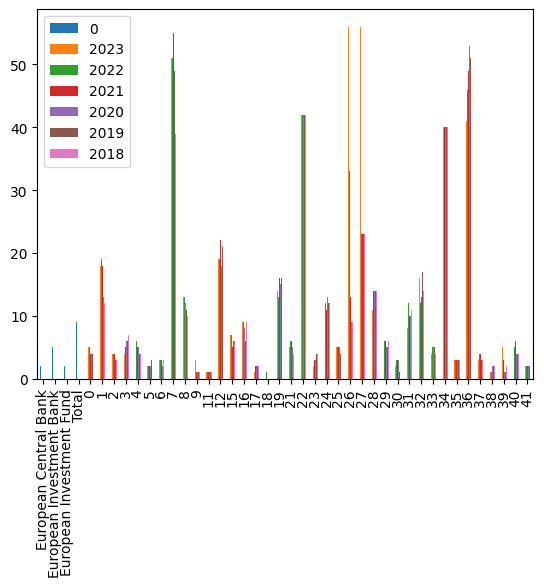

In [150]:
print(type(df_european_financial_institutions_women))
df_women_research_fundings = df_women_research_fundings.drop(index=20).drop(index=13).drop(index=14).drop(index=10)
df_women_research_fundings = df_women_research_fundings.fillna("")


efw_wrf_concat = pd.concat([df_european_financial_institutions_women, df_women_research_fundings], axis=1)
efw_wrf_concat.fillna('')

print(efw_wrf_concat)
efw_wrf_concat.plot(kind="bar")




C:\Users\salva\AppData\Local\Temp\ipykernel_20256\2828146669.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  row_averages = dataframe.mean(axis=1).astype(int)
C:\Users\salva\AppData\Local\Temp\ipykernel_20256\2828146669.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_women_research_fundings['Average'] = women_research_average.mean(axis=1)


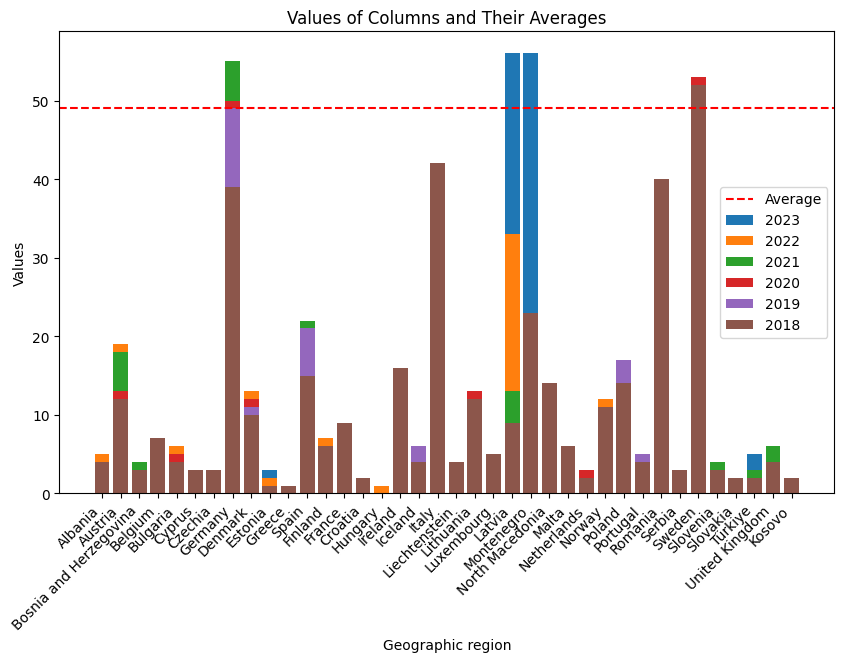

In [151]:
# df_women_research_fundings.head()
def average_calculator_new(dataframe):
    row_averages = dataframe.mean(axis=1).astype(int)
    result_df = dataframe.copy()
    result_df['Average'] = row_averages
    return result_df

women_research_average = average_calculator_new(df_women_research_fundings)
# women_research_average.plot(kind="bar")
df_women_research_fundings['Average'] = women_research_average.mean(axis=1)

# Plotting
plt.figure(figsize=(10, 6))

for col in women_research_average.columns[1:-1]:  # Exclude 'Geographic region' and 'Average' columns
    plt.bar(women_research_average['Geographic region'], women_research_average[col], label=col)

# Plot average as a horizontal line
plt.axhline(y=women_research_average['Average'].max(), color='red', linestyle='--', label='Average')

# Adding labels and title
plt.xlabel('Geographic region')
plt.ylabel('Values')
plt.title('Values of Columns and Their Averages')

# Displaying the legend
plt.legend()

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

C:\Users\salva\AppData\Local\Temp\ipykernel_20256\2828146669.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  row_averages = dataframe.mean(axis=1).astype(int)
C:\Users\salva\AppData\Local\Temp\ipykernel_20256\3848656607.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_women_research_fundings['Average'] = women_pol_p_average.mean(axis=1)


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38],
 [Text(0, 0, 'Albania'),
  Text(1, 0, 'Austria'),
  Text(2, 0, 'Bosnia and Herzegovina'),
  Text(3, 0, 'Belgium'),
  Text(4, 0, 'Bulgaria'),
  Text(5, 0, 'Cyprus'),
  Text(6, 0, 'Czechia'),
  Text(7, 0, 'Germany'),
  Text(8, 0, 'Denmark'),
  Text(9, 0, 'Estonia'),
  Text(10, 0, 'EEA countries (non-EU)'),
  Text(11, 0, 'Greece'),
  Text(12, 0, 'Spain'),
  Text(13, 0, 'Finland'),
  Text(14, 0, 'France'),
  Text(15, 0, 'Croatia'),
  Text(16, 0, 'Hungary'),
  Text(17, 0, 'Ireland'),
  Text(18, 0, 'Iceland'),
  Text(19, 0, 'Italy'),
  Text(20, 0, 'Liechtenstein'),
  Text(21, 0, 'Lithuania'),
  Text(22, 0, 'Luxembourg'),
  Text(23, 0, 'Latvia'),
  Text(24, 0, 'Montenegro'),
  Text(25, 0, 'North Macedonia'),
  Text(26, 0, 'Malta'),
  Text(27, 0, 'Netherlands'),
  Text(28,

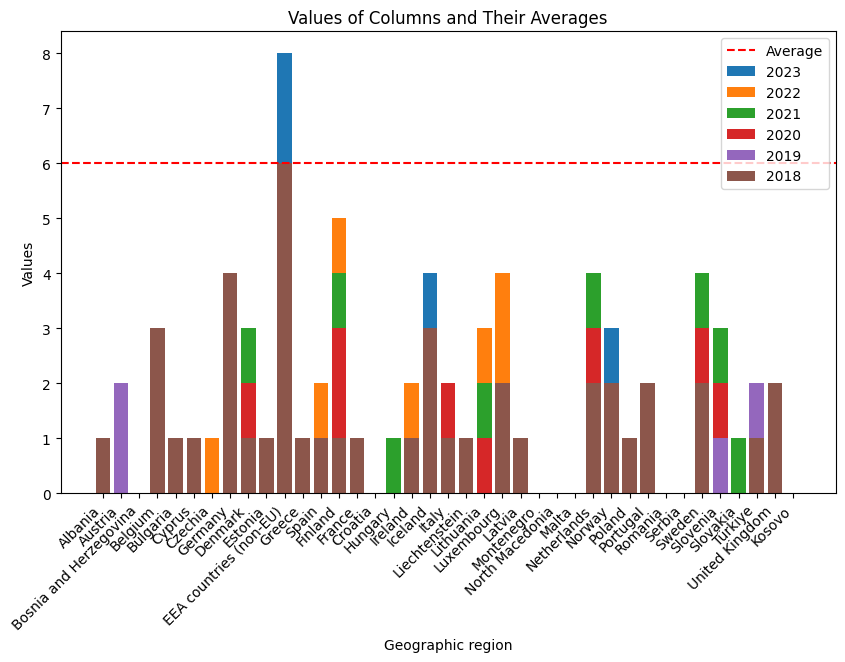

In [152]:
df_women_political_parties = df_women_political_parties.drop(index=13).drop(index=14).drop(index=20)
women_pol_p_average = average_calculator_new(df_women_political_parties)

df_women_research_fundings['Average'] = women_pol_p_average.mean(axis=1)

# Plotting
plt.figure(figsize=(10, 6))

for col in women_pol_p_average.columns[1:-1]:  # Exclude 'Geographic region' and 'Average' columns
    plt.bar(women_pol_p_average['Geographic region'], women_pol_p_average[col], label=col)

# Plot average as a horizontal line
plt.axhline(y=women_pol_p_average['Average'].max(), color='red', linestyle='--', label='Average')

# Adding labels and title
plt.xlabel('Geographic region')
plt.ylabel('Values')
plt.title('Values of Columns and Their Averages')

# Displaying the legend
plt.legend()

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the p


In [153]:
#Average for women in the public administration
df_public_adm_men, df_public_adm_total, df_public_adm_women = column_remove(df_public_adm_men, df_public_adm_total, df_public_adm_women)
df_public_adm_women = df_public_adm_women.drop(index=0).drop(index=1)
df_public_adm_women = df_public_adm_women.rename(columns={"Time": "Agency"})
mean_values = df_public_adm_women.iloc[:, 1:].mean(axis=1)
df_public_adm_women['Mean'] = mean_values.round()
df_public_adm_women.fillna('')
# df_public_adm_women = df_public_adm_women.astype(int)
# df_public_adm_women.fillna('')
# adm_women_average = average_calculator_new(df_public_adm_women)
# print(adm_women_average)
# df_public_adm_women['Agency'].plot(kind="bar")


,Agency,2023,2022,2021,2020,2019,2018,Mean
2,Agency for the Cooperation of Energy Regulator...,8,7,7,6,8,7,7.0
3,Body of European Regulators for Electronic Com...,7,9,8,6,5,4,6.0
4,Community Plant Variety Office (CPVO),10,12,13,12,11,13,12.0
5,Euratom Supply Agency (ESA),,,,,,,
6,European Agency for Reconstruction (EAR),,,,,,,
7,European Agency for Safety and Health at Work ...,30,32,34,36,36,32,33.0
8,European Agency for the Management of Operatio...,4,3,3,4,4,4,4.0
9,European Agency for the Operational Management...,6,5,5,5,5,2,5.0
10,European Asylum Support Office (EASO),,,11,13,15,14,13.0
11,European Aviation Safety Agency (EASA),8,6,5,5,3,4,5.0


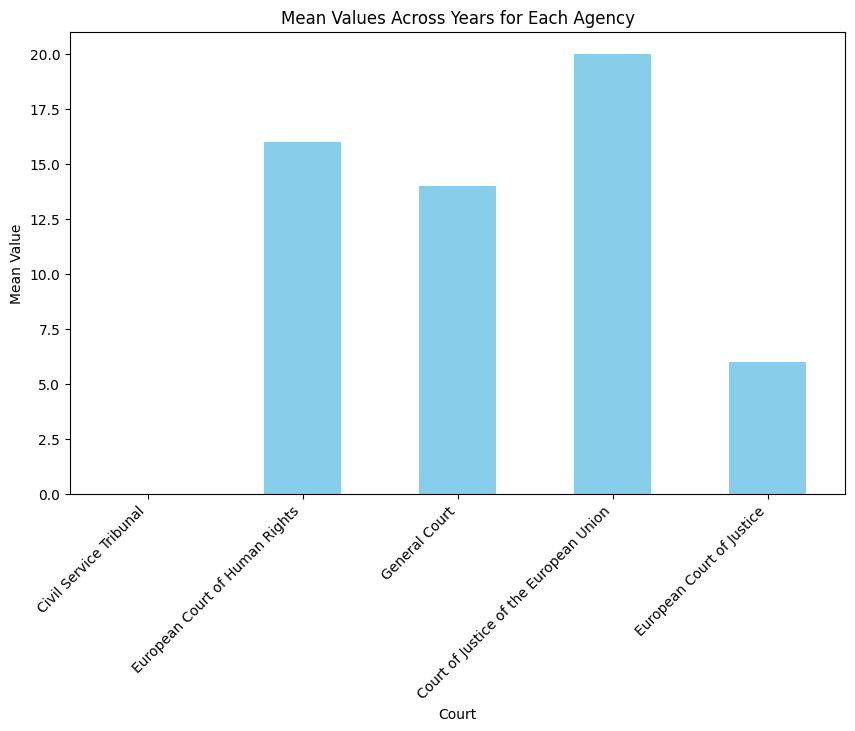

In [154]:
#Average number of women judges in the EU
df_women_european_court = df_women_european_court.iloc[:, :7]
df_women_european_court = df_women_european_court.rename(columns={"Time": "Court"})
df_women_european_court = df_women_european_court.fillna(0)
df_women_european_court = df_women_european_court.drop(index=0)
mean_values_court = df_women_european_court.iloc[:, 1:].mean(axis=1)
df_women_european_court['Mean'] = mean_values_court.round()
df_women_european_court
df_women_european_court.set_index('Court', inplace=True)

# Plotting
plt.figure(figsize=(10, 6))
df_women_european_court['Mean'].plot(kind='bar', color='skyblue')
plt.xlabel('Court')
plt.ylabel('Mean Value')
plt.title('Mean Values Across Years for Each Agency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()



C:\Users\salva\AppData\Local\Temp\ipykernel_20256\2828146669.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  row_averages = dataframe.mean(axis=1).astype(int)


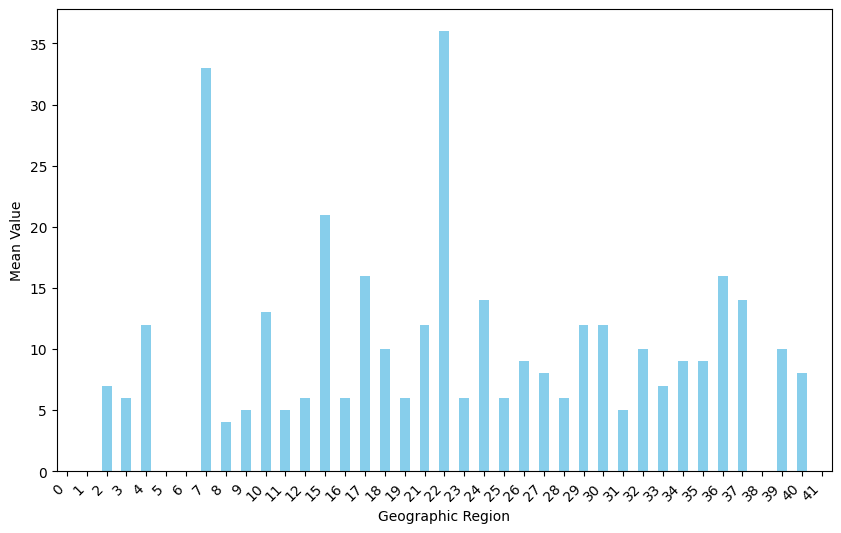

In [155]:
#Number of women political executives regarding climate change 
# df_women_political_executives = df_women_political_executives.drop(index=20).drop(index=13).drop(index=14)
average_calculator_new(df_women_political_executives)
df_women_political_executives = df_women_political_executives.fillna(0)
mean_values_pexe = df_women_political_executives.iloc[:, 1:].mean(axis=1)
df_women_political_executives['Mean'] = mean_values.round()
df_women_political_executives = df_women_political_executives.fillna(0)
df_women_political_executives
plt.figure(figsize=(10, 6))
df_women_political_executives['Mean'].plot(kind='bar', color='skyblue')
plt.xlabel('Geographic Region')
plt.ylabel('Mean Value')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

In [156]:
#Average and relative concatenated graph of the research funds

def average_calculator_new(dataframe):
    row_averages = dataframe.mean(axis=1).astype(int)
    result_df = dataframe.copy()
    result_df['Average'] = row_averages
    return result_df
df_men_research_fundings = df_men_research_fundings.drop(index=13).drop(index=14).drop(index=20)
df_women_research_fundings = df_women_research_fundings.drop(index=13).drop(index=14).drop(index=20)
df_total_research_fundings = df_total_research_fundings.drop(index=13).drop(index=14).drop(index=20)
df_women_research_fundings = df_women_research_fundings.rename(columns={"Geographic region\Time": "Geographic region"})
df_men_research_fundings = df_men_research_fundings.rename(columns={"Geographic region\Time": "Geographic region"})
df_total_research_fundings = df_total_research_fundings.rename(columns={"Geographic region\Time": "Geographic region"})
df_men_research_fundings = df_men_research_fundings.fillna(0)
df_women_research_fundings = df_women_research_fundings.fillna(0)
df_total_research_fundings = df_total_research_fundings.fillna(0)
df_men_research_fundings = average_calculator_new(df_men_research_fundings)
df_women_research_fundings = average_calculator_new(df_women_research_fundings)
df_total_research_fundings = average_calculator_new(df_total_research_fundings)
df_men_research_fundings = df_men_research_fundings[["Geographic region", "Average"]]
df_women_research_fundings = df_women_research_fundings[["Geographic region", "Average"]]
df_total_research_fundings = df_total_research_fundings[["Geographic region", "Average"]]
# merged_research_first_df = pd.merge(df_men_research_fundings, df_women_research_fundings, on=['Geographic region', 'Average'])
# merged_research_final_df = pd.merge(merged_research_first_df, df_total_research_fundings, on=['Geographic region', 'Average'])
# merged_research_first_df
# merged_research_first_df
concatenated_df_research_funding = pd.concat([df_men_research_fundings, df_women_research_fundings], ignore_index=True)#df_total_research_fundings
concatenated_df_research_funding.plot(kind="bar", x="Geographic region", y="Average", figsize=(14, 6))
concatenated_df_research_funding



KeyError: '[13] not found in axis'

C:\Users\salva\AppData\Local\Temp\ipykernel_20256\3688976020.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  row_averages = dataframe.mean(axis=1).astype(int)
C:\Users\salva\AppData\Local\Temp\ipykernel_20256\3688976020.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  row_averages = dataframe.mean(axis=1).astype(int)
C:\Users\salva\AppData\Local\Temp\ipykernel_20256\3688976020.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  row_averages = dataframe.mean(axis=1).astype(int)


,Geographic region,Average
0,Albania,1
1,Austria,2
2,Bosnia and Herzegovina,1
3,Belgium,1
4,Bulgaria,6
...,...,...
79,Slovenia,3
80,Slovakia,0
81,Türkiye,1
82,United Kingdom,4


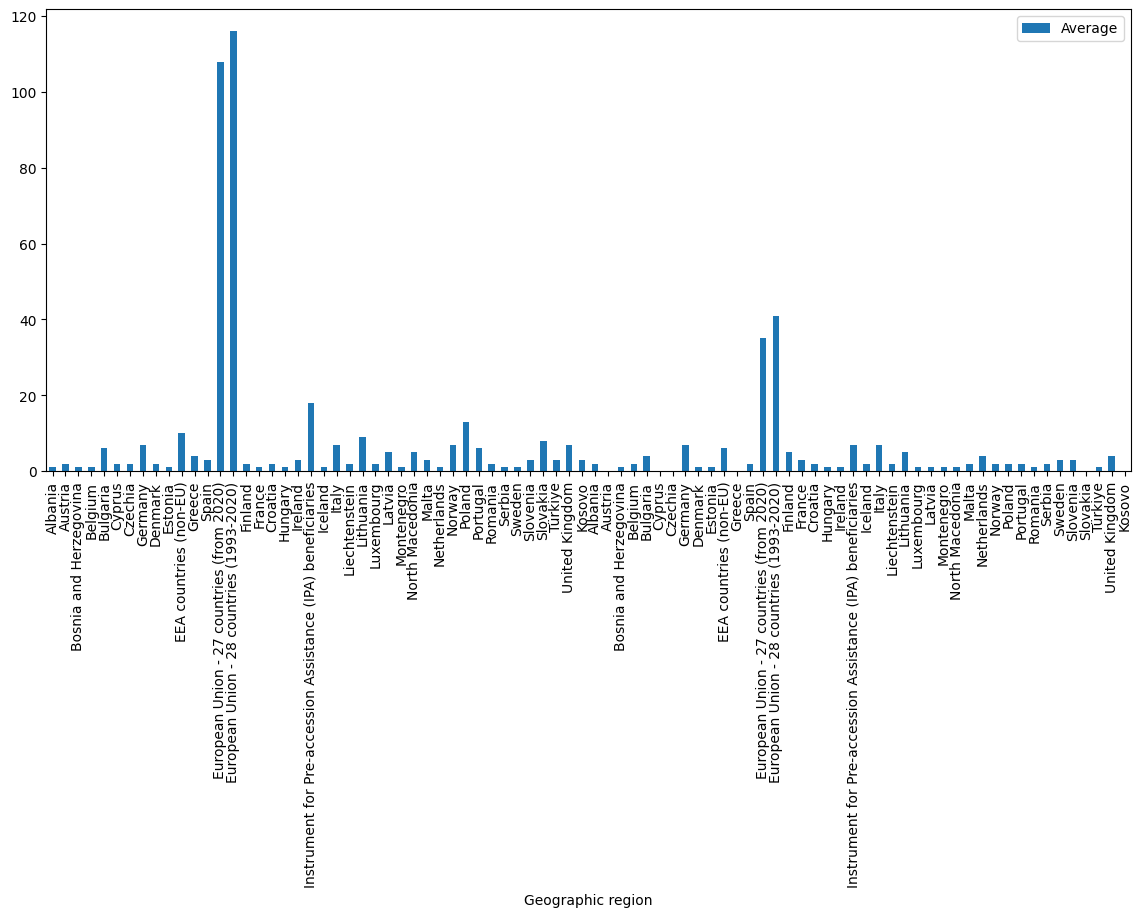

In [ ]:
#Average calculated with the relative graph of the concatenated political executives
df_men_research_fundings = df_men_research_fundings.drop(index=13).drop(index=14).drop(index=20)
df_women_research_fundings = df_women_research_fundings.drop(index=13).drop(index=14).drop(index=20)
df_total_research_fundings = df_total_research_fundings.drop(index=13).drop(index=14).drop(index=20)
df_women_political_executives = df_women_political_executives.rename(columns={"Geographic region\Time": "Geographic region"})
df_men_political_executives = df_men_political_executives.rename(columns={"Geographic region\Time": "Geographic region"})
df_total_political_executives = df_total_political_executives.rename(columns={"Geographic region\Time": "Geographic region"})
df_men_political_executives = df_men_political_executives.fillna(0)
df_women_political_executives = df_women_political_executives.fillna(0)
df_total_political_executives = df_total_political_executives.fillna(0)
df_men_political_executives = average_calculator_new(df_men_political_executives)
df_women_political_executives = average_calculator_new(df_women_political_executives)
df_total_political_executives = average_calculator_new(df_total_political_executives)
df_men_political_executives = df_men_political_executives[["Geographic region", "Average"]]
df_women_political_executives = df_women_political_executives[["Geographic region", "Average"]]
df_total_political_executives = df_total_political_executives[["Geographic region", "Average"]]
# merged_research_first_df = pd.merge(df_men_research_fundings, df_women_research_fundings, on=['Geographic region', 'Average'])
# merged_research_final_df = pd.merge(merged_research_first_df, df_total_research_fundings, on=['Geographic region', 'Average'])
# merged_research_first_df
# merged_research_first_df
concatenated_df_political_executives = pd.concat([df_men_political_executives, df_women_political_executives], ignore_index=True)#df_total_political_executives
concatenated_df_political_executives.plot(kind="bar", x="Geographic region", y="Average", figsize=(14, 6))
concatenated_df_political_executives

C:\Users\salva\AppData\Local\Temp\ipykernel_20256\3688976020.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  row_averages = dataframe.mean(axis=1).astype(int)
C:\Users\salva\AppData\Local\Temp\ipykernel_20256\3688976020.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  row_averages = dataframe.mean(axis=1).astype(int)
C:\Users\salva\AppData\Local\Temp\ipykernel_20256\3688976020.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  row_averages = dataframe.mean(axis=1).astype(int)


<Axes: xlabel='Geographic region'>

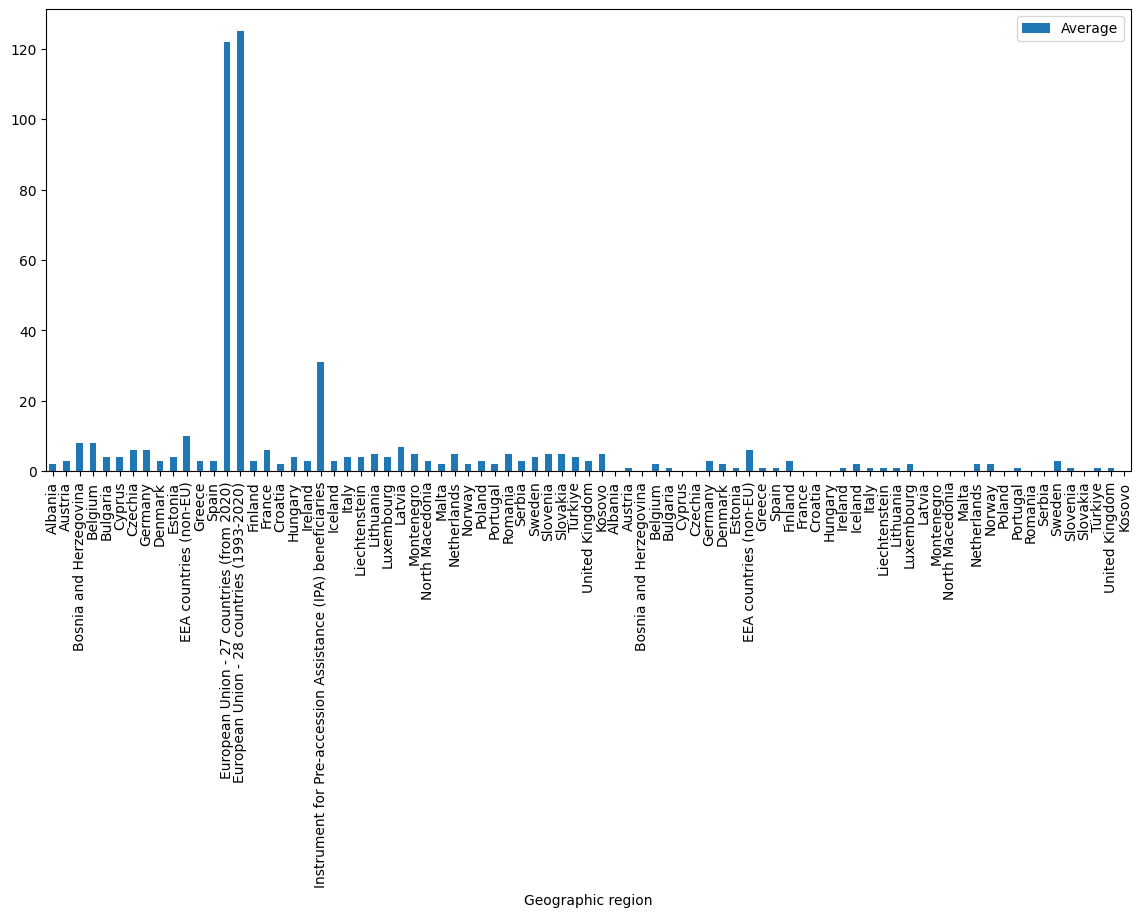

In [ ]:
#Averages for women in political parties
df_men_political_parties, df_women_political_parties, df_total_political_parties = column_remove(df_men_political_parties, df_women_political_parties, df_total_political_parties)
# df_men_political_parties = df_men_political_parties.drop(index=20).drop(index=13).drop(index=14).drop(index=10)
# df_women_political_parties = df_women_political_parties.drop(index=20).drop(index=13).drop(index=14).drop(index=10)
# df_total_political_parties = df_total_political_parties.drop(index=20).drop(index=13).drop(index=14).drop(index=10)
df_women_political_parties = df_women_political_parties.rename(columns={"Geographic region\Time": "Geographic region"})
df_men_political_parties = df_men_political_parties.rename(columns={"Geographic region\Time": "Geographic region"})
df_total_political_parties = df_total_political_parties.rename(columns={"Geographic region\Time": "Geographic region"})
df_men_political_parties = average_calculator_new(df_men_political_parties)
df_women_political_parties = average_calculator_new(df_women_political_parties)
df_total_political_parties = average_calculator_new(df_total_political_parties)
df_men_political_parties = df_men_political_parties[["Geographic region", "Average"]]
df_women_political_parties = df_women_political_parties[["Geographic region", "Average"]]
df_total_political_parties = df_total_political_parties[["Geographic region", "Average"]]
concatenated_df_political_parties = pd.concat([df_men_political_parties, df_women_political_parties], ignore_index=True)#df_total_political_parties
concatenated_df_political_parties.plot(kind="bar", x="Geographic region", y="Average", figsize=(14, 6))



In [ ]:
#Averages in public adminstration 
df_public_adm_men, df_public_adm_total, df_public_adm_women
df_public_adm_women = df_public_adm_women.rename(columns={"Time": "Agency"})
df_public_adm_men = df_public_adm_men.rename(columns={"Time": "Agency"})
df_public_adm_total = df_public_adm_total.rename(columns={"Time": "Agency"})
# df_public_adm_men = df_public_adm_men.drop(index=0).drop(index=1)
# df_public_adm_total =df_public_adm_total.drop(index=0).drop(index=1)
df_public_adm_women = df_public_adm_women.fillna(0) 
df_public_adm_men = df_public_adm_men.fillna(0) 
df_public_adm_total = df_public_adm_total.fillna(0)
df_public_adm_men = average_calculator_new(df_public_adm_men)
df_public_adm_women = average_calculator_new(df_public_adm_women)
df_public_adm_total = average_calculator_new(df_public_adm_total)
df_public_adm_men = df_public_adm_men[["Agency", "Average"]]
df_public_adm_women = df_public_adm_women[["Agency", "Average"]]
df_public_adm_total = df_public_adm_total[["Agency", "Average"]]
concatenated_df_public_adm = pd.concat([df_public_adm_men, df_public_adm_women], ignore_index=True)#df_public_adm_total
concatenated_df_public_adm.plot(kind="bar", x="Agency", y="Average", figsize=(14, 6))




C:\Users\salva\AppData\Local\Temp\ipykernel_20256\3688976020.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  row_averages = dataframe.mean(axis=1).astype(int)


IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

<class 'pandas.core.series.Series'>


C:\Users\salva\AppData\Local\Temp\ipykernel_20256\2885750911.py:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_series_fin_inst = df_european_financial_institutions_men.append(df_european_financial_institutions_women)


<Axes: xlabel='Time'>

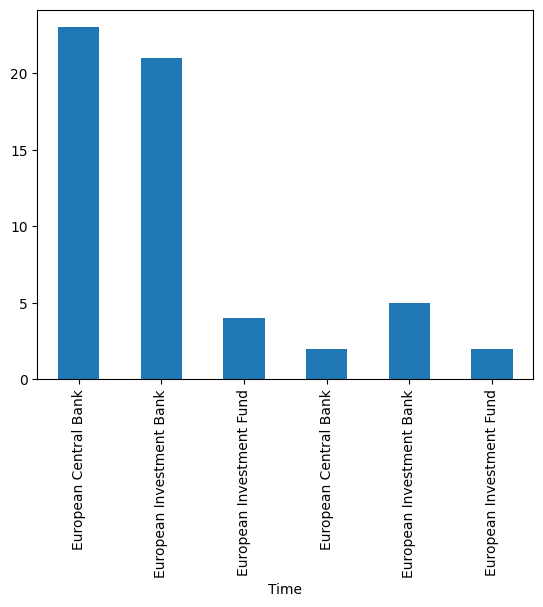

In [ ]:
# df_european_financial_institutions_men = df_european_financial_institutions_men.drop("Total")
# df_european_financial_institutions_women = df_european_financial_institutions_women.drop("Total")
print(type(df_european_financial_institutions_women))
merged_series_fin_inst = df_european_financial_institutions_men.append(df_european_financial_institutions_women)
merged_series_fin_inst.plot(kind="bar")

C:\Users\salva\AppData\Local\Temp\ipykernel_20256\367129739.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  row_averages = dataframe.mean(axis=1).astype(int)


<Axes: xlabel='Court'>

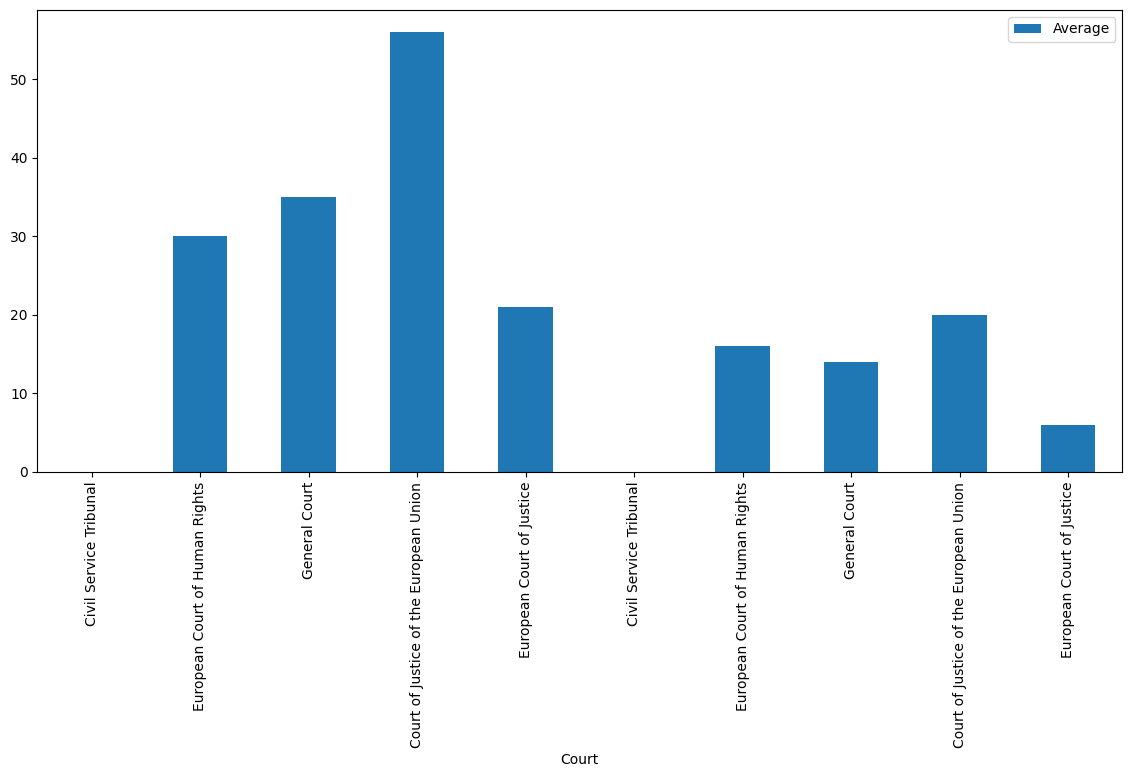

In [175]:
#Averages of men and women in the european court 
df_women_european_court
df_men_european_court = df_men_european_court.fillna(0)
df_men_european_court = df_men_european_court.iloc[:, :7]
df_men_european_court, df_women_european_court, df_total_european_court = force_to_numeric(df_men_european_court, df_women_european_court, df_total_european_court)
df_women_european_court = df_women_european_court.rename(columns={"Mean": "Average"})
df_men_european_court = df_men_european_court.rename(columns={"Time": "Court"})
df_men_european_court = average_calculator_new(df_men_european_court)
# df_men_european_court = df_men_european_court.drop(index=0)
concatenated_df_european_court = pd.concat([df_men_european_court, df_women_european_court], ignore_index=True)
concatenated_df_european_court.set_index("Court")
concatenated_df_european_court = concatenated_df_european_court.plot(kind="bar", x="Court", y="Average", figsize=(14, 6))
# concatenated_df_european_court.set_xticks(range(len(df['court'])))
concatenated_df_european_court.set_xticklabels(['Civil Service Tribunal', 'European Court of Human Rights', 'General Court', 'Court of Justice of the European Union', 'European Court of Justice', 'Civil Service Tribunal', 'European Court of Human Rights', 'General Court', 'Court of Justice of the European Union', 'European Court of Justice'])
concatenated_df_european_court

